# PISA dataset exploration 
## by Grzegorz Lippe

## Preliminary Wrangling

PISA is a survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a
conventional school test. Rather than examining how well
students have learned the school curriculum, it looks at how
well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the
PISA 2012 assessment of reading, mathematics and science
representing about 28 million 15-year-olds globally. Of those
economies, 44 took part in an assessment of creative problem
solving and 18 in an assessment of financial literacy.

> Source: Udacity Supporting Materials  
> Dataset for Communicate Data Findings Project

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### What is the structure of your dataset?

> The psia dataset is a 485490 x 635 large csv file. Luckily it contains also a dictionary with explanations of the different columns, so I will be able to pick some columns of interest.

In [2]:
# The dataset is huge, so first I'll read the description of the columns:
df_columns = pd.read_csv('pisadict2012.csv', encoding = 'ISO-8859-1', index_col=0)
df_columns.x.to_dict()

{'CNT': 'Country code 3-character',
 'SUBNATIO': 'Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)',
 'STRATUM': 'Stratum ID 7-character (cnt + region ID + original stratum ID)',
 'OECD': 'OECD country',
 'NC': 'National Centre 6-digit Code',
 'SCHOOLID': 'School ID 7-digit (region ID + stratum ID + 3-digit school ID)',
 'STIDSTD': 'Student ID',
 'ST01Q01': 'International Grade',
 'ST02Q01': 'National Study Programme',
 'ST03Q01': 'Birth - Month',
 'ST03Q02': 'Birth -Year',
 'ST04Q01': 'Gender',
 'ST05Q01': 'Attend <ISCED 0>',
 'ST06Q01': 'Age at <ISCED 1>',
 'ST07Q01': 'Repeat - <ISCED 1>',
 'ST07Q02': 'Repeat - <ISCED 2>',
 'ST07Q03': 'Repeat - <ISCED 3>',
 'ST08Q01': 'Truancy - Late for School',
 'ST09Q01': 'Truancy - Skip whole school day',
 'ST115Q01': 'Truancy - Skip classes within school day',
 'ST11Q01': 'At Home - Mother',
 'ST11Q02': 'At Home - Father',
 'ST11Q03': 'At Home - Brothers',
 'ST11Q04': 'At Home - Sisters',
 'ST11Q05': 'At H


### What is/are the main feature(s) of interest in your dataset?

**First the personal data of the pupils**

* 'CNT': 'Country code 3-character'
* 'SCHOOLID': 'School ID 7-digit (region ID + stratum ID + 3-digit school ID)'
* 'STIDSTD': 'Student ID'
* 'ST01Q01': 'International Grade'
* 'ST02Q01': 'National Study Programme'
* 'ST03Q01': 'Birth - Month',
* 'ST03Q02': 'Birth -Year'
* 'ST04Q01': 'Gender'

**Second the test scores**

PISA uses a normalized score called [Plausible Value](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjh_pmI-eXpAhWLY8AKHSDLD6sQFjAAegQIAhAB&url=https%3A%2F%2Fwww.oecd-ilibrary.org%2Fplausible-values_5kskx1cl3btd.pdf%3FitemId%3D%252Fcontent%252Fcomponent%252F9789264056275-7-en%26mimeType%3Dpdf&usg=AOvVaw1YATZ69yDwNQaWAAyu3S7V), which is estimated 5 times ([multiple imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)#Multiple_imputation)). The pisa documentation suggest to calculate the arithmetic mean, but here I will use only the first value, to safe memory space. 

* 'PVMATH': Mean of Plausible values 1-5 in mathematics
* 'PVMACC': Mean of Plausible values 1-5 subscale of math - Change and Relationships
* 'PVMACQ': Mean of Plausible values 1-5 subscale of math - Quantity
* 'PVMACS': Mean of Plausible values 1-5 subscale of math - Space and Shape
* 'PVMACU': Mean of Plausible values 1-5 subscale of math - Uncertainty and Data
* 'PVMAPE': Mean of Plausible values 1-5 subscale of math - Employ
* 'PVMAPF': Mean of Plausible values 1-5 subscale of math - Formulate
* 'PVMAPI': Mean of Plausible values 1-5 subscale of math - Interpret
* 'PVREAD': Mean of Plausible value 1-5 in reading
* 'PVSCIE': Mean of Plausible value 1-5 in science

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Since the originating country and the school of a studend are not the only influencal data additionla surrounding data is included:

* 'ST13Q01': 'Mother Highest Schooling',
* 'ST15Q01': 'Mother Current Job Status',
* 'ST17Q01': 'Father Highest Schooling',
* 'ST19Q01': 'Father Current Job Status',
* 'ST27Q01': 'How many - cellular phones',
* 'ST27Q02': 'How many - televisions',
* 'ST27Q03': 'How many - computers',
* 'ST27Q04': 'How many - cars',
* 'ST27Q05': 'How many - rooms bath or shower',
* 'ST28Q01': 'How many books at home',

In [35]:
def get_pisa():
    try:
        df = pd.read_csv('pisa2012_select.csv')
    except FileNotFoundError:
        columns = ['CNT', 'SCHOOLID', 'STIDSTD', 'ST01Q01', 'ST02Q01', 'ST03Q01', 'ST03Q02', 'ST04Q01', # personal data
                   'ST13Q01', 'ST15Q01', 'ST17Q01', 'ST19Q01',                                          # parents status
                   'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST27Q05', 'ST28Q01'] # belongings
        df =  pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1", 
                          usecols=columns, low_memory=False)

        columns = ['PVMATH', # Math scales 
                   'PVMACC', # Relationships
                   'PVMACQ', # Quantity
                   'PVMACS', # Space and Shape
                   'PVMACU', # Uncertainty and Data
                   'PVMAPE', # Employ
                   'PVMAPF', # Formulate
                   'PVMAPI', # Interpret
                   'PVREAD', # Reading
                   'PVSCIE'] # Science

        for column in columns:
            mean_columns = [column[:2] + '1' + column[2:],
                            column[:2] + '2' + column[2:],
                            column[:2] + '3' + column[2:],
                            column[:2] + '4' + column[2:],
                            column[:2] + '5' + column[2:]]
            df_temp =  pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1", 
                                    usecols=mean_columns, low_memory=False)
            df[column] = df_temp.values.mean(axis=1)
    return df

In [76]:
df = get_pisa()
df.tail()


,CNT,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST27Q01,ST27Q02,...,PVMATH,PVMACC,PVMACQ,PVMACS,PVMACU,PVMAPE,PVMAPF,PVMAPI,PVREAD,PVSCIE
485485,Vietnam,162,4955,10,3.0,6,1996,Female,Three or more,One,...,486.22058,499.92990,475.78284,468.77236,491.36158,480.92382,493.69840,465.34506,472.61846,536.31110
485486,Vietnam,162,4956,10,3.0,2,1996,Male,Three or more,Two,...,529.21794,551.80714,526.41378,509.90030,514.88548,551.65132,565.98380,466.74714,487.24356,524.37522
485487,Vietnam,162,4957,10,3.0,6,1996,Male,Three or more,One,...,486.29850,517.30022,472.74496,485.98692,482.40382,505.92774,492.21842,469.62924,476.25694,541.90600
485488,Vietnam,162,4958,10,3.0,6,1996,Male,Three or more,One,...,522.90856,554.84498,529.14004,541.60308,502.50040,546.74402,545.18618,467.91556,518.43922,526.70646
485489,Vietnam,162,4959,10,3.0,12,1996,Female,Three or more,One,...,454.43994,446.49480,410.66366,398.20064,381.21982,457.71150,444.78110,402.56272,488.66354,492.95038


In [27]:
df.to_csv('pisa2012_select.csv', index=False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [28]:
df.ST01Q01.unique()

array([10,  9,  8, 11,  7, 12, 96, 13], dtype=int64)

In [82]:
df.drop(index=df.index[df.ST01Q01 == 96], inplace=True) # the distribution of 

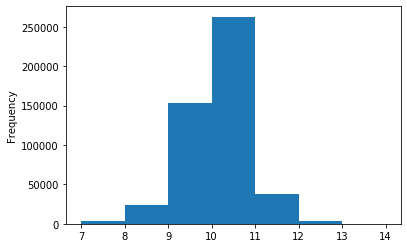

In [37]:
df.ST01Q01.plot(kind='hist', bins=[7, 8, 9, 10, 11, 12, 13, 14]);

The dataset contains sone 800 rows with a internationla score of 96. This seems to be a mistace, comparing to over 400'000 values ranging in the bins of 7, 8, 9, 10, 11, 12 and 13. Therefore these rows were dropped.

The histogram above shows the distribution of the international grade in the PISA dataset. The most achieved value grade is 10, with a slight right skew in the data. So it seem, that grades 11 to 13 are more difficult to achieve than 7 to 9.

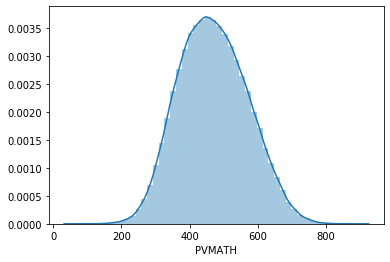

In [39]:
sb.distplot(df.PVMATH);

So the mean value is roundabout 400, and a slightly sqewed to the right.

Text(0.5, 1.0, 'How many - cellular phones')

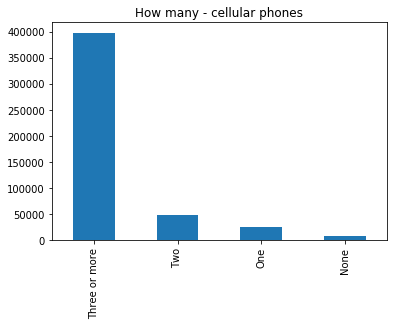

In [58]:
df.ST27Q01.value_counts().plot(kind='bar');
plt.title('How many - cellular phones');

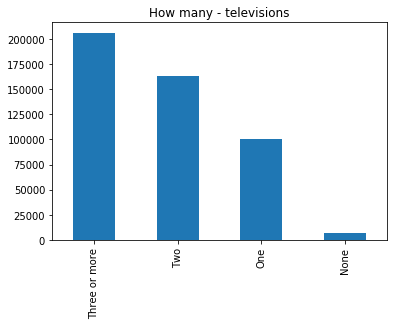

In [59]:
df.ST27Q02.value_counts().plot(kind='bar');
plt.title('How many - televisions');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Are there correlations within gender, country or amount of phones in the house to the students grades?

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Is there a linkage to the schooling status of the parents?

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5, 0, 'Gender')

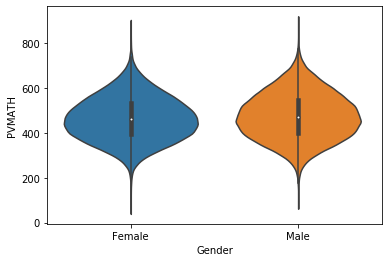

In [52]:
sb.violinplot(x='ST04Q01', y='PVMATH', data=df);
plt.xlabel('Gender')
plt.ylabel('Math Scales')

Text(0, 0.5, 'Relationships')

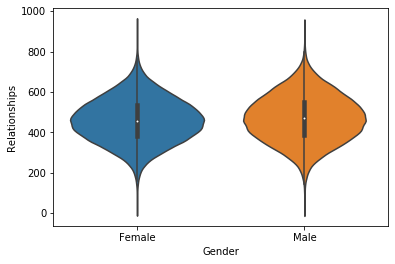

In [55]:
sb.violinplot(x='ST04Q01', y='PVMACC', data=df);
plt.xlabel('Gender')
plt.ylabel('Relationships')


Text(0, 0.5, 'Interpret')

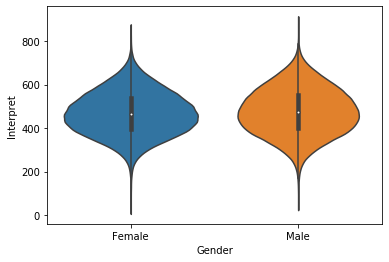

In [56]:
sb.violinplot(x='ST04Q01', y='PVMAPI', data=df);
plt.xlabel('Gender')
plt.ylabel('Interpret')

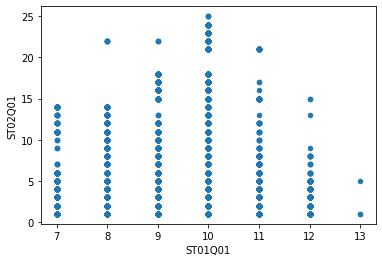

In [83]:
df.plot(kind='scatter', x='ST01Q01', y='ST02Q01');

There is no correlation between the international grade and the national study program.

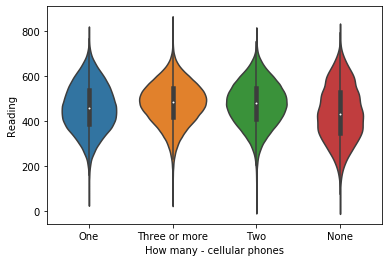

In [63]:
sb.violinplot(x='ST27Q02', y='PVREAD', data=df);
plt.xlabel('How many - cellular phones');
plt.ylabel('Reading');

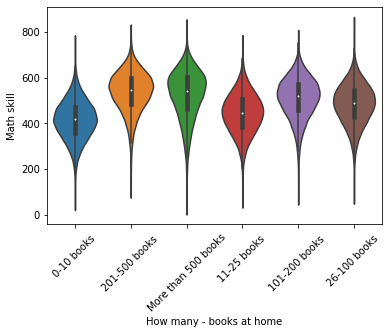

In [74]:
sb.violinplot(x='ST28Q01', y='PVREAD', data=df);
plt.xlabel('How many - books at home');
plt.ylabel('Math skill');
plt.xticks(rotation=45);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Male studends seem to have a slightly higher skill mean for math, interpreting, and relationships, but a slightly lower skill in reading.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The number of cellular phones seems to have a high correlation to skills.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

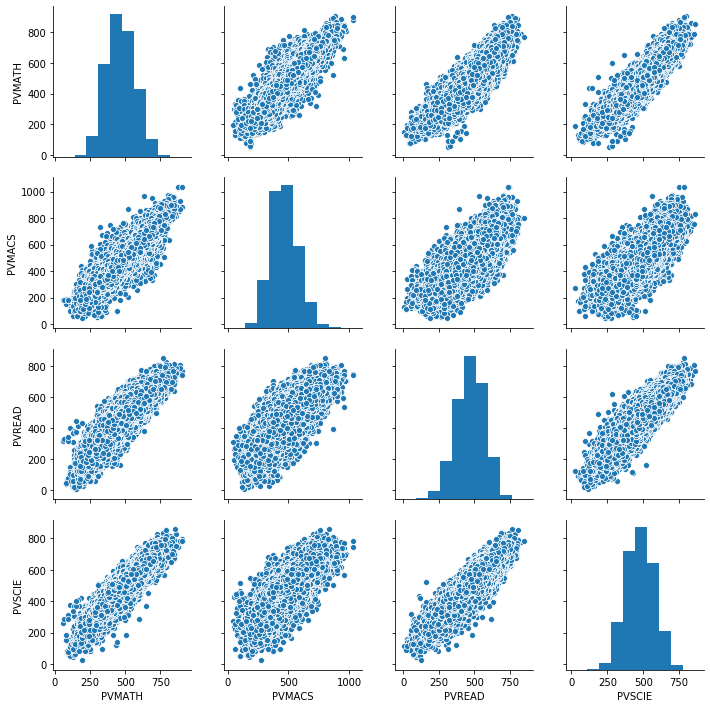

In [88]:

#                         Math scales,           Reading,  Science
#                                      Space and Shape
sb.pairplot(data = df, vars=['PVMATH', 'PVMACS', 'PVREAD', 'PVSCIE']);


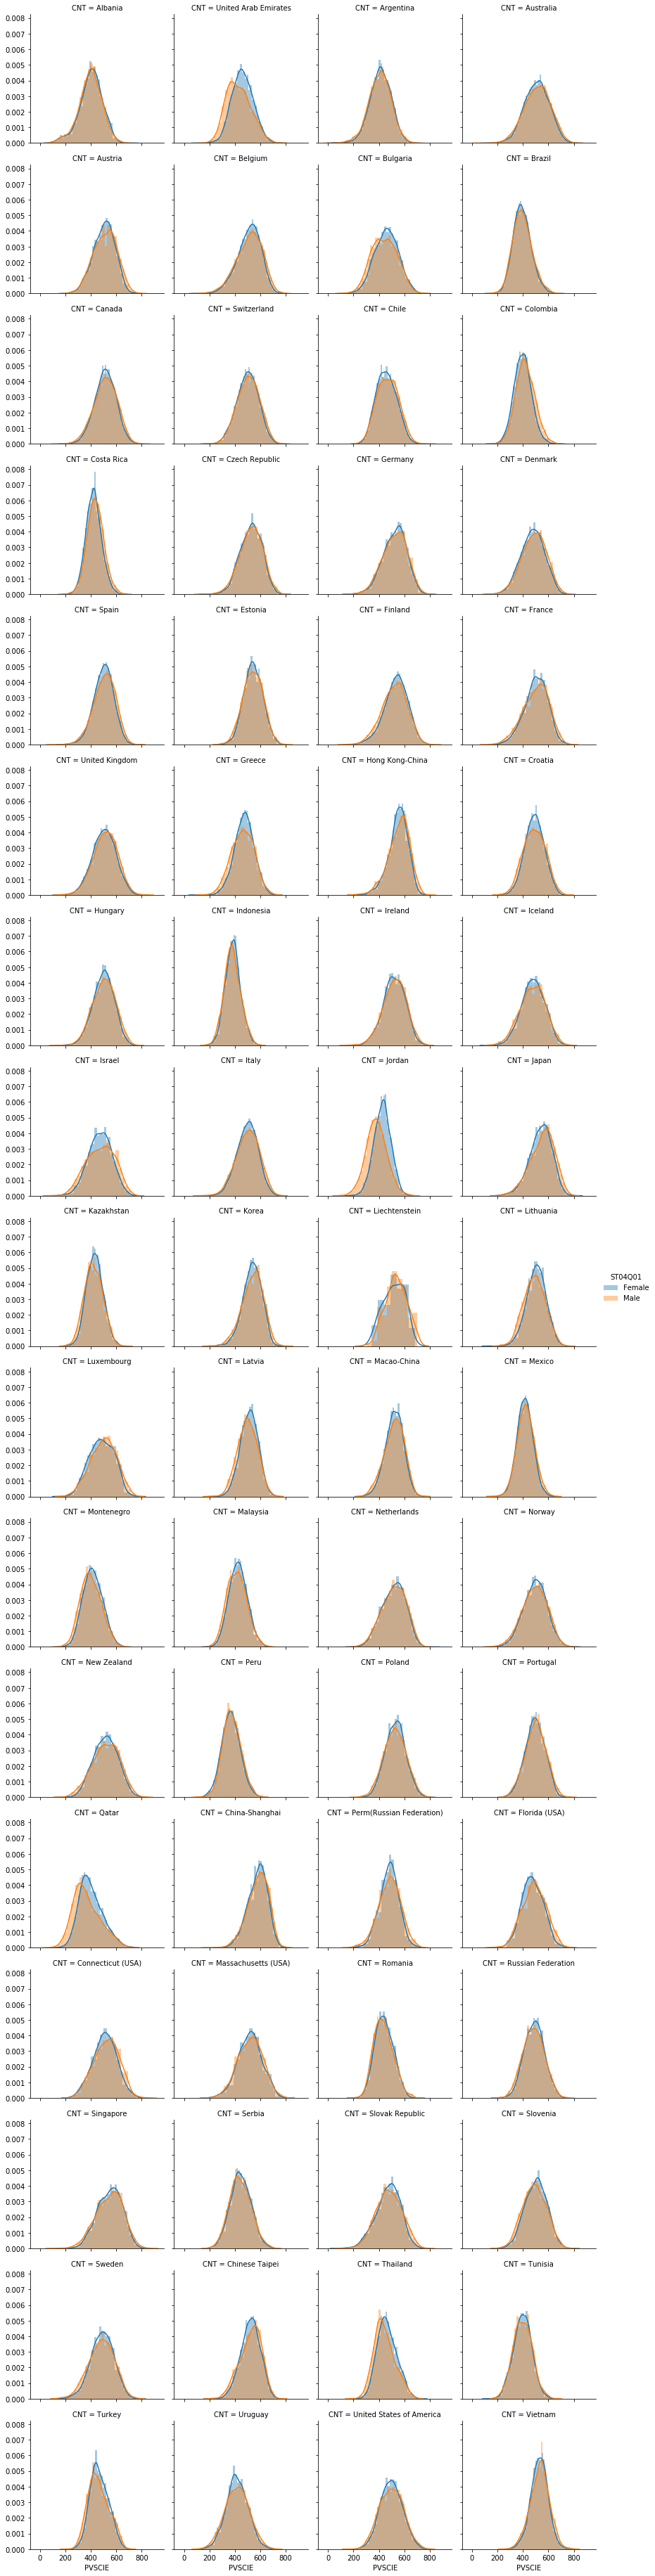

In [105]:
g = sb.FacetGrid(df, col="CNT", hue='ST04Q01', col_wrap=4);
g.map(sb.distplot, 'PVSCIE').add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Mostly linear correlation for different skill sets.

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!